In [59]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [37]:
crypto_df = pd.read_csv(Path('crypto_data.csv'), index_col=0)

In [38]:
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [39]:
drop_cn_df=crypto_df.drop(["CoinName"], axis='columns')
drop_cn_df

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,True,PoW/PoS,4.199995e+01,42
365,X11,True,PoW/PoS,NaN,2300000000
404,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SHA-256,True,PoW,NaN,611000
808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
XBC,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,SHA-256,False,PoW/PoS,NaN,21000000


In [40]:
modified_df = drop_cn_df[drop_cn_df.IsTrading !=False]
modified_df

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,True,PoW/PoS,4.199995e+01,42
365,X11,True,PoW/PoS,NaN,2300000000
404,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SHA-256,True,PoW,NaN,611000
808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Ethash,True,PoW,NaN,1000000000
UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Equihash,True,PoW,7.296538e+06,21000000


In [41]:
modified_df.isnull().sum()

Algorithm            0
IsTrading            0
ProofType            0
TotalCoinsMined    459
TotalCoinSupply      0
dtype: int64

In [42]:
Clean_df=modified_df.dropna()

In [43]:
Clean_df

,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,True,PoW/PoS,4.199995e+01,42
404,Scrypt,True,PoW/PoS,1.055185e+09,532000000
808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,X13,True,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,True,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,SHA-256,True,DPoS,2.000000e+09,2000000000
GAP,Scrypt,True,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Equihash,True,PoW,7.296538e+06,21000000


In [44]:
crypto_clean_df = Clean_df.drop(["IsTrading"], axis='columns')
crypto_clean_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
808,SHA-256,PoW/PoS,0.000000e+00,0
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [45]:
crypto_clean_df.isnull().sum()

Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [46]:
Mined_df=crypto_clean_df[crypto_clean_df.TotalCoinsMined > 0]
Mined_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [49]:
# Transform the remaining fetures numeric values-Algorithm, ProofType


DF_dummies=pd.get_dummies(Mined_df,columns=['Algorithm', 'ProofType'])
DF_dummies.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# * Standardize your dataset so that columns that contain larger values do not unduly influence the outcome.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(DF_dummies)
DF_dummies_scaled = scaler.transform(DF_dummies)
DF_dummies_scaled[:10]


array([[-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
        -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
        -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
        -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
        -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
        -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
        -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
        -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
        -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.39879994, -0.0433963 , -0.1

In [72]:
# Perform PCA , preserve 90% of the explained variance in dimensionality reduction.
# Initialize PCA model for 3 principal components
pca = PCA(n_components=.9)

# Get two principal components for the iris data.
scaled_pca = pca.fit_transform(DF_dummies_scaled)

pca.explained_variance_ratio_

array([0.0279317 , 0.02141802, 0.02051615, 0.02044661, 0.0204466 ,
       0.0204466 , 0.0204466 , 0.02042554, 0.01870913, 0.01756291,
       0.01741106, 0.01629007, 0.01596154, 0.01551138, 0.01435005,
       0.01321122, 0.01236583, 0.01206255, 0.01104295, 0.01071499,
       0.01049079, 0.01040887, 0.01039089, 0.01037741, 0.01035414,
       0.01034034, 0.01029605, 0.01028233, 0.01028139, 0.01028139,
       0.01028138, 0.01027965, 0.01027051, 0.01026331, 0.01026202,
       0.01025761, 0.01025565, 0.01025068, 0.01024924, 0.01024279,
       0.01024259, 0.01024259, 0.0102419 , 0.01024018, 0.01023676,
       0.01023495, 0.01023   , 0.01022442, 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ,
       0.0102233 , 0.0102233 , 0.0102233 , 0.0102233 ])

In [63]:
# the dataset dimensions with t-SNE and visually inspect the results. In order to accomplish this task, run t-SNE on the principal components: 
# the output of the PCA transformation. Then create a scatter plot of the t-SNE output. Observe whether there are distinct clusters or not.


# Run t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(scaled_pca)

# Check that dimensions have been reduced to two
tsne_features.shape

(532, 2)

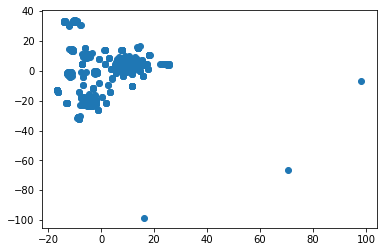

In [64]:
# Prepare to plot the dataset

# The first column of transformed features
t_sne_x = tsne_features[:,0]

# The second column of transform
t_sne_y = tsne_features[:,1]
# t-SNE scattor plot 
plt.scatter(t_sne_x, t_sne_y )
plt.show()



C:\Users\abbyk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


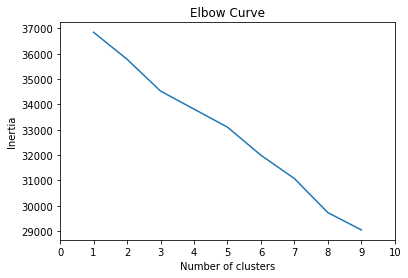

In [71]:
# Create an elbow plot to identify the best number of clusters. Use a for-loop to determine the inertia for each `k` between 1 through 10. 
# Determine, if possible, where the elbow of the plot is, and at which value of `k` it appears.

# Finding the best value for k
inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(scaled_pca)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()